## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [ ]:
#CREATE dataframe with imbalance dataset

class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

In [2]:
n_class_0,n_class_1

(900, 100)

In [2]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [3]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

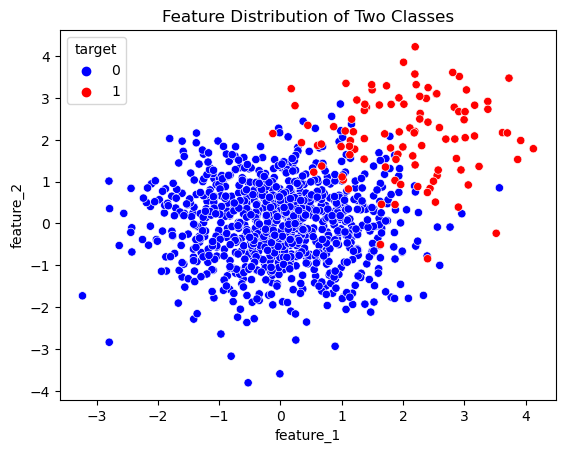

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine both classes
df = pd.concat([class_0, class_1], ignore_index=True)

# Scatter plot
sns.scatterplot(data=df, x="feature_1", y="feature_2", hue="target", palette=['blue', 'red'])
plt.title("Feature Distribution of Two Classes")
plt.show()


In [5]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [6]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [7]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [9]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [42]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [43]:
df_minority_upsampled.shape

(900, 3)

In [13]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [20]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [21]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

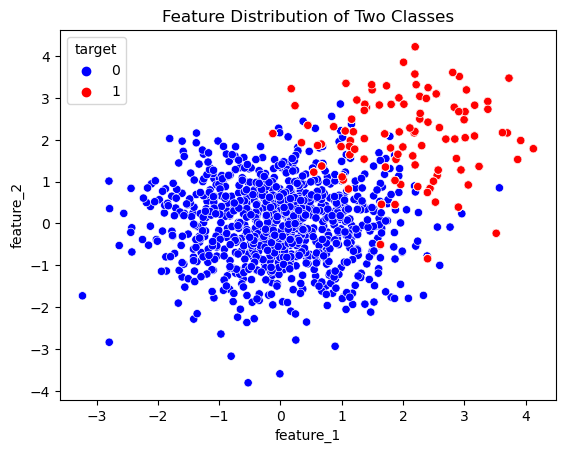

In [22]:
sns.scatterplot(data=df_upsampled,x='feature_1', y='feature_2', hue='target', palette=['blue','red'])

plt.title("Feature Distribution of Two Classes")
plt.show()


## Down Sampling

In [74]:
#DownSampling 
import pandas as pd
import numpy as np

#Setting seed
np.random.seed(123)

n_samples=1000
class_0_ratio=0.1
n_class_02=int(n_samples*class_0_ratio)
n_class_12=n_samples-n_class_02


In [75]:
n_class_02,n_class_12

(100, 900)

In [76]:
#Create Dataframe wit imbalance data set

class_02=pd.DataFrame({
    "feature1":np.random.normal(loc=0,scale=1,size=n_class_02),
    "feature2":np.random.normal(loc=0,scale=1,size=n_class_02),
    'target': [0]*n_class_02
})


class_12=pd.DataFrame({
    "feature1":np.random.normal(loc=2,scale=1,size=n_class_12),
    "feature2":np.random.normal(loc=2,scale=1,size=n_class_12),
    'target': [1]*n_class_12
})

In [77]:
df=pd.concat([class_02,class_12])

In [78]:
df['target'].value_counts()

target
1    900
0    100
Name: count, dtype: int64

In [79]:
## downsampling
df_minority=df[df['target']==0]
df_majority=df[df['target']==1]

In [80]:
from sklearn.utils import resample
df_downsampled1=resample(df_majority, replace=False,
         n_samples=len(df_minority),
         random_state=42
)



In [81]:
df_downsampled1.head()

,feature1,feature2,target
70,0.786615,2.675504,1
827,2.203044,2.913005,1
231,3.520166,2.289796,1
588,0.841584,3.284221,1
39,1.800888,1.911475,1


In [82]:
df_downsampled1=pd.concat([df_minority,df_downsampled1])

In [83]:
df_downsampled1.target.value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [84]:
print(df_downsampled1.columns)


Index(['feature1', 'feature2', 'target'], dtype='object')


<Axes: xlabel='feature1', ylabel='feature2'>

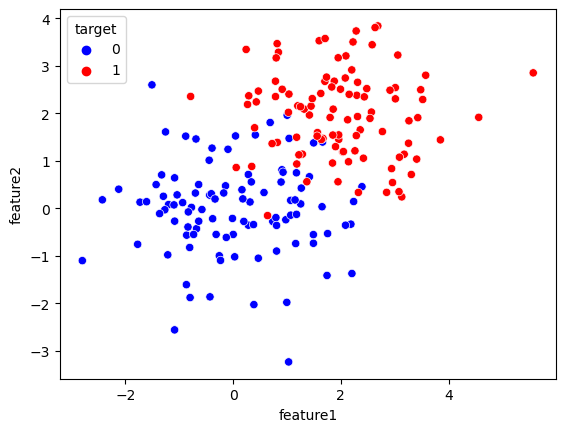

In [85]:
sns.scatterplot(data=df_downsampled1,x='feature1', y='feature2', hue='target', palette=['blue','red'])